### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

### 2. Load Dataset

In [2]:
df = pd.read_csv("world_population.csv")

df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


### 3.Data Preprocessing

In [3]:
df.shape

(234, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [5]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [6]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [7]:
df.isna().sum() # 0 Missing Values
df['Country/Territory'].value_counts() # 234 Countries/Territories
df['Continent'].value_counts() # 6 Continents

Continent
Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: count, dtype: int64

### 4. Data Visualization and EDA

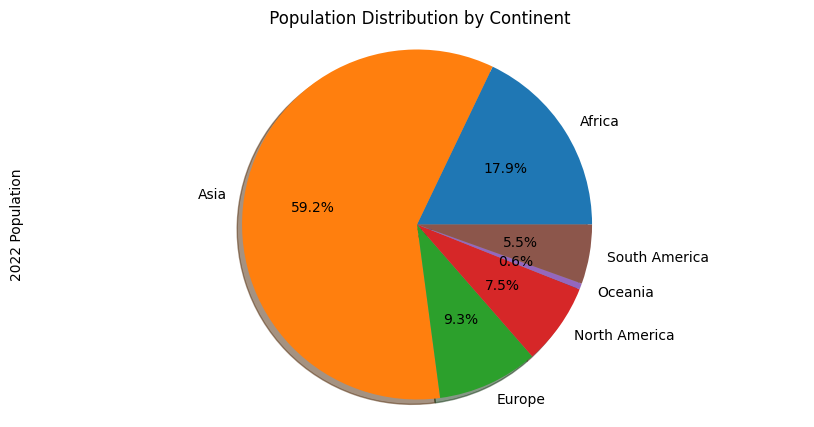

In [8]:
continent_df = df.groupby(by='Continent').sum()
continent_df
continent_df['2022 Population'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%1.1f%%') # autopct create %
plt.title(' Population Distribution by Continent')
plt.axis('equal')
plt.show()


In [11]:
# Global Population Trend:¶
# Add all values in each column into one entry per year
years = ['1970 Population', '1980 Population','1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population','2022 Population']

total_year_population = {year: df[year].sum() for year in years}
print(total_year_population)

# Create a Series to store this data
year_population_data = pd.Series(total_year_population)
year_population_data.index = year_population_data.index.str[:4]
year_population_data

{'1970 Population': np.int64(3694136661), '1980 Population': np.int64(4442400371), '1990 Population': np.int64(5314191665), '2000 Population': np.int64(6147055703), '2010 Population': np.int64(6983784998), '2015 Population': np.int64(7424809761), '2020 Population': np.int64(7839250603), '2022 Population': np.int64(7973413042)}


1970    3694136661
1980    4442400371
1990    5314191665
2000    6147055703
2010    6983784998
2015    7424809761
2020    7839250603
2022    7973413042
dtype: int64

In [15]:
#creating dataframes for countries per continent

# Asia
asian_countries = df.loc[df["Continent"]=="Asia"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# Africa
african_countries = df.loc[df["Continent"]=="Africa"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# Europe
european_countries = df.loc[df["Continent"]=="Europe"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# North America
na_countries = df.loc[df["Continent"]=="North America"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# Oceania
oc_countries = df.loc[df["Continent"]=="Oceania"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# South America
sa_countries = df.loc[df["Continent"]=="South America"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

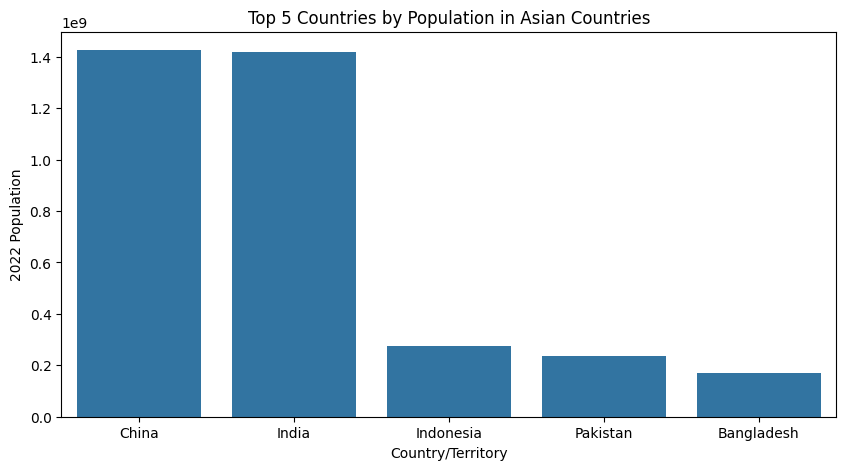

In [20]:
# plotting top 5 MOST populated countries by continent

# Asian countries

top_5_countries = asian_countries[["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

plt.figure(figsize = (10,5))
sns.barplot(data=top_5_countries, x="Country/Territory", y="2022 Population")
plt.xlabel("Country/Territory")
plt.ylabel("2022 Population")
plt.title("Top 5 Countries by Population in Asian Countries")

plt.show()

Text(0.5, 1.0, 'Top 5 Countries by Population in African Countries')

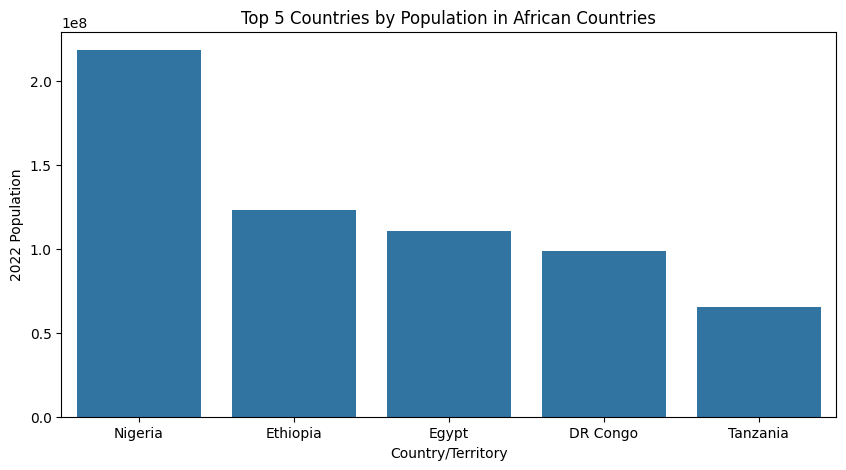

In [21]:
top_5_african = african_countries[["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

plt.figure(figsize = (10,5))
sns.barplot(data=top_5_african, x="Country/Territory", y="2022 Population")
plt.xlabel("Country/Territory")
plt.ylabel("2022 Population")
plt.title("Top 5 Countries by Population in African Countries")

Text(0.5, 1.0, 'Top 5 Countries by Population in europ Countries')

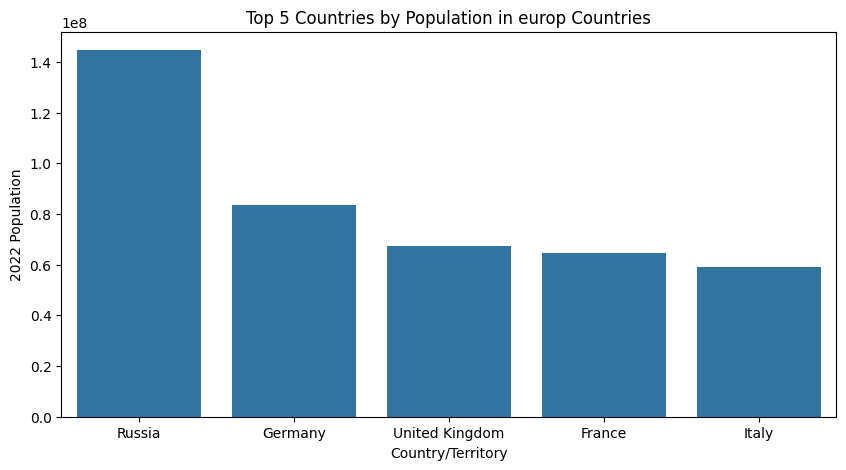

In [23]:
top_5_european =european_countries [["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

plt.figure(figsize = (10,5))
sns.barplot(data=top_5_european, x="Country/Territory", y="2022 Population")
plt.xlabel("Country/Territory")
plt.ylabel("2022 Population")
plt.title("Top 5 Countries by Population in europ Countries")

Text(0.5, 1.0, 'Top 5 Countries by Population in Ocien Countries')

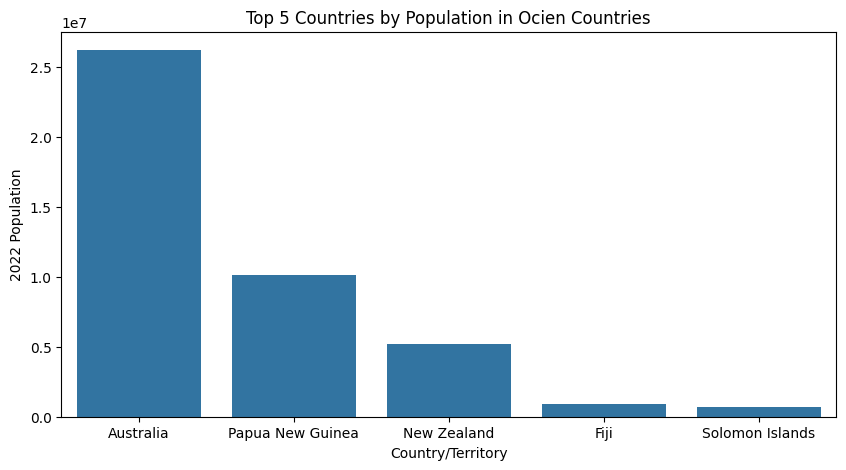

In [22]:
top_5_oc =oc_countries [["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

plt.figure(figsize = (10,5))
sns.barplot(data=top_5_oc, x="Country/Territory", y="2022 Population")
plt.xlabel("Country/Territory")
plt.ylabel("2022 Population")
plt.title("Top 5 Countries by Population in Ocien Countries")

Text(0.5, 1.0, 'Top 5 Countries by Population in South America Countries')

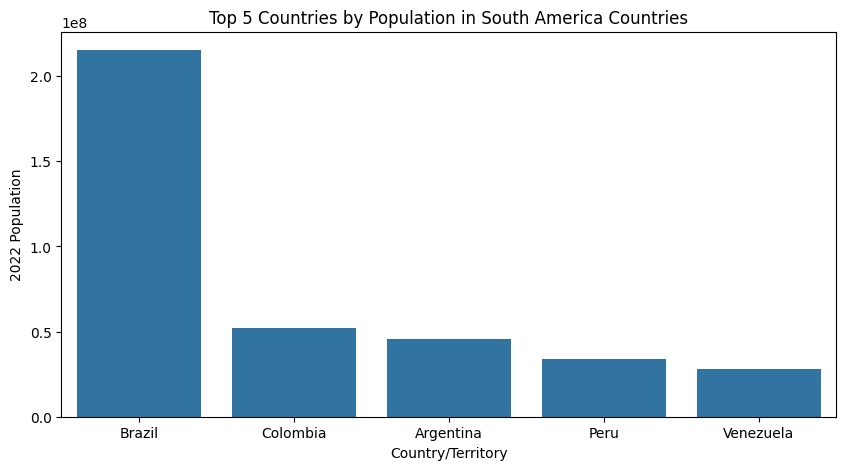

In [24]:
plt.figure(figsize = (10,5))
top_5_sa =sa_countries [["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

sns.barplot(data=top_5_sa, x="Country/Territory", y="2022 Population")
plt.xlabel("Country/Territory")
plt.ylabel("2022 Population")
plt.title("Top 5 Countries by Population in South America Countries")

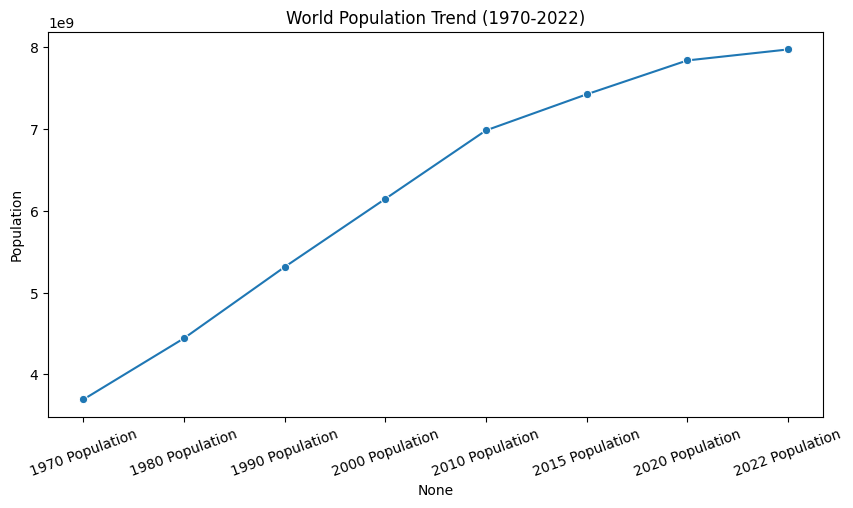

In [25]:
plt.subplots(figsize=(10,5))
trend = df.iloc[:,5:13].sum().sort_values(ascending=True)

sns.lineplot(x=trend.index, y=trend.values, marker="o")
plt.xticks(rotation=20)
plt.ylabel("Population")
plt.title("World Population Trend (1970-2022)")
plt.show()

In [29]:
# Columns with population data
pop_columns = [col for col in df.columns if "Population" in col]

# Convert wide -> long format
long_df = df.melt(id_vars=["Country/Territory", "Continent", "Area (km²)", "Density (per km²)", "Growth Rate"],
                  value_vars=pop_columns, var_name="Year", value_name="Population")
# Extract numeric year safely
long_df['Year'] = long_df['Year'].str.extract('(\d+)')  # extract digits
long_df = long_df.dropna(subset=['Year'])               # drop rows where year could not be extracted
long_df['Year'] = long_df['Year'].astype(int)

<>:8: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:8: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\sreekanth\AppData\Local\Temp\ipykernel_8516\2774941553.py:8: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  long_df['Year'] = long_df['Year'].str.extract('(\d+)')  # extract digits


In [30]:
# ---- Population Growth Prediction using Linear Regression ----
country_lr = "India"
country_data = long_df[long_df['Country/Territory'] == country_lr].sort_values('Year')

X = country_data['Year'].values.reshape(-1,1)
y = country_data['Population'].values

### 5. Model Building

In [31]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
# Predict next 10 years
future_years = np.arange(country_data['Year'].max()+1, country_data['Year'].max()+11).reshape(-1,1)
predictions = model.predict(future_years)

In [38]:
predictions

array([1.44841852e+09, 1.46551396e+09, 1.48260939e+09, 1.49970483e+09,
       1.51680027e+09, 1.53389570e+09, 1.55099114e+09, 1.56808658e+09,
       1.58518201e+09, 1.60227745e+09])

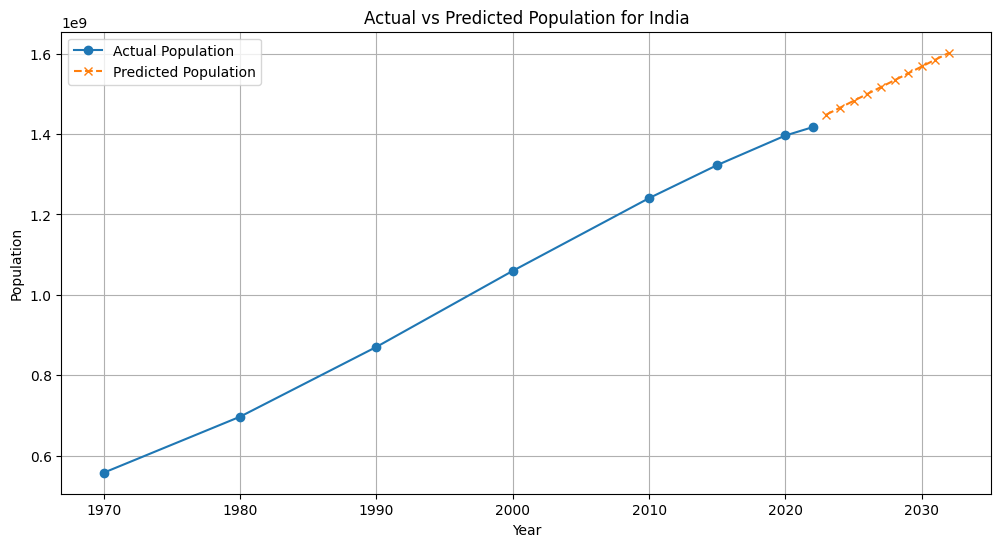

In [37]:
plt.figure(figsize=(12,6))
plt.plot(country_data['Year'], country_data['Population'], label="Actual Population", marker='o')
plt.plot(future_years.flatten(), predictions, label="Predicted Population", linestyle='--', marker='x')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title(f"Actual vs Predicted Population for {country_data['Country/Territory'].iloc[0]}")
plt.legend()
plt.grid(True)
plt.show()

### 6. Model Evaluation

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict for existing years (for evaluation)
y_actual = country_data['Population'].values
y_pred = model.predict(country_data['Year'].values.reshape(-1,1))

# Model evaluation on known data
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)

print(f"MAE: {mae:,.0f}")
print(f"MSE: {mse:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R² Score: {r2:.4f}")

MAE: 11,299,584
MSE: 155,783,678,092,644
RMSE: 12,481,333
R² Score: 0.9984
